## Data loading

### Subtask:
Load the placement prediction dataset.


In [4]:
import pandas as pd

df = pd.read_csv('Placement_Prediction_data.csv')
display(df.head())

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed
4,4,5,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed


## Data exploration

### Subtask:
Explore the loaded dataset to understand the features, target variable (placement status), and potential issues like missing values or outliers.


In [5]:
# 1. Examine the data shape and column names
print(f"Data shape: {df.shape}")
print("Column names:", df.columns.tolist())

# 2. Explore the target variable
print("\nPlacement status distribution:")
print(df['PlacementStatus'].value_counts())

# 3. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Data shape: (10000, 14)
Column names: ['Unnamed: 0', 'StudentId', 'CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', 'Internship', 'Hackathon', '12th Percentage', '10th Percentage', 'backlogs', 'PlacementStatus']

Placement status distribution:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

Missing values per column:
Unnamed: 0                    0
StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
dtype: int64



Data types:
Unnamed: 0                      int64
StudentId                       int64
CGPA                          float64
Major Projects                  int64
Workshops/Certificatios         int64
Mini Projects                   int64
Skills                          int64
Communication Skill Rating    float64
Internship                     object
Hackathon                      object
12th Percentage                 int64
10th Percentage                 int64
backlogs                        int64
PlacementStatus                object
dtype: object

Descriptive statistics for numerical features:
        Unnamed: 0    StudentId          CGPA  Major Projects  \
count  10000.00000  10000.00000  10000.000000    10000.000000   
mean    4999.50000   5000.50000      7.698010        1.049200   
std     2886.89568   2886.89568      0.640131        0.665901   
min        0.00000      1.00000      6.500000        0.000000   
25%     2499.75000   2500.75000      7.400000        1.000000   
50%

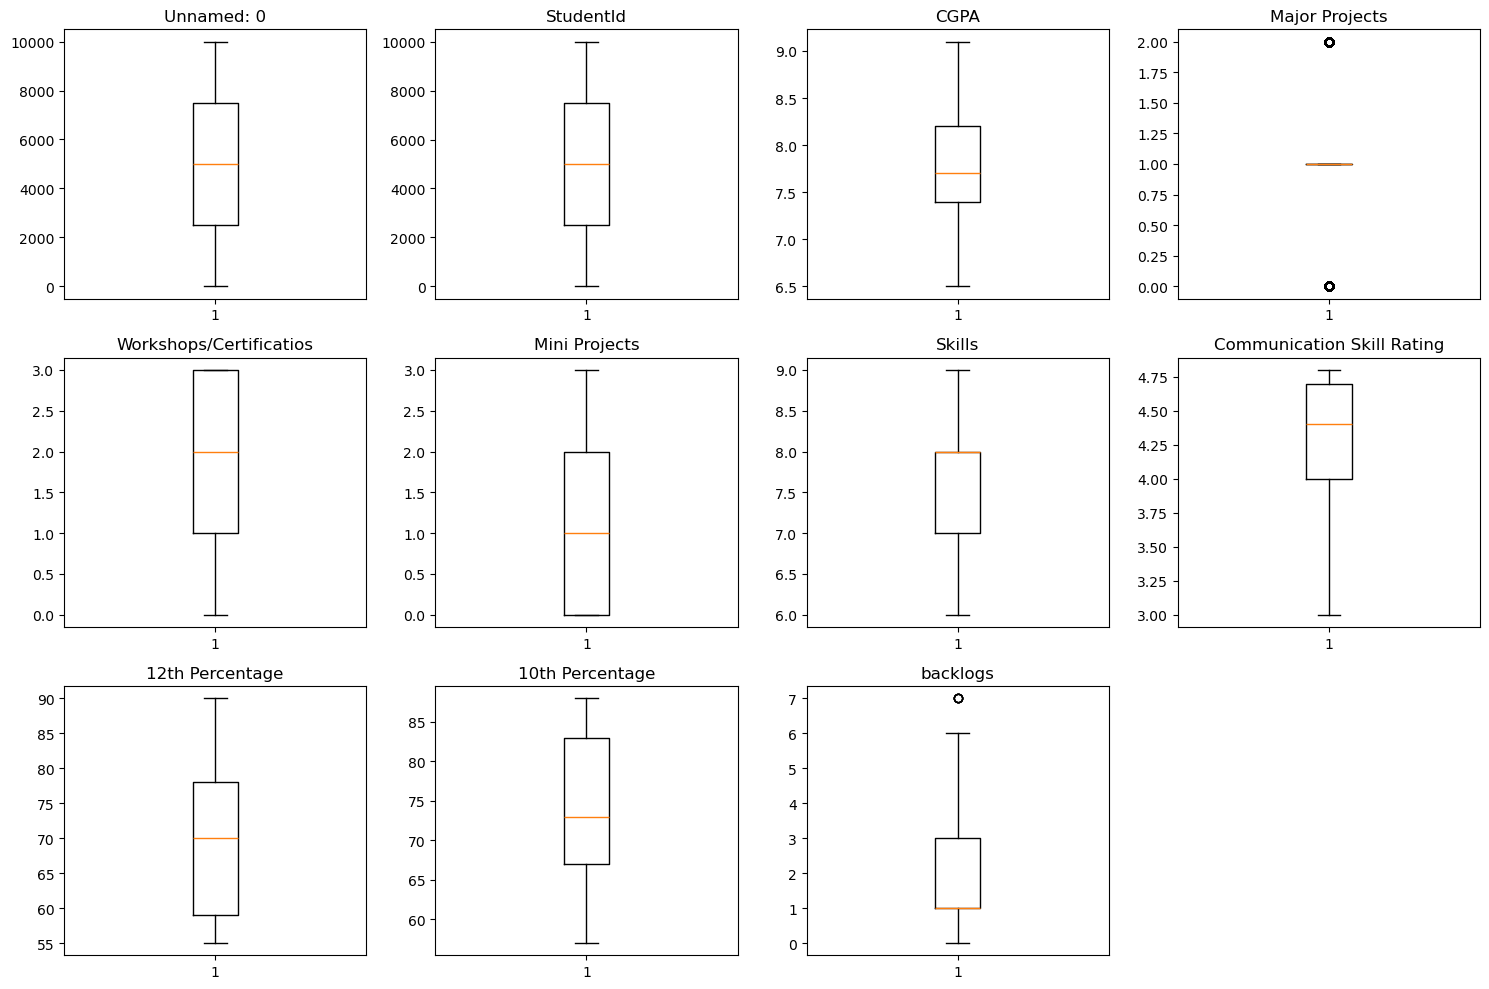


Correlation matrix:
CGPA                          1.000000
10th Percentage               0.462313
Skills                        0.451911
Workshops/Certificatios       0.435928
12th Percentage               0.404971
Communication Skill Rating    0.383547
Mini Projects                 0.349686
Major Projects                0.280601
Unnamed: 0                    0.005724
StudentId                     0.005724
backlogs                     -0.585865
Name: CGPA, dtype: float64


In [6]:
# 4. Examine data types and distributions
print("\nData types:")
print(df.dtypes)

print("\nDescriptive statistics for numerical features:")
print(df.describe())

print("\nUnique values and frequency counts for categorical features:")
for column in df.select_dtypes(include=['object']):
  print(f"\nColumn: {column}")
  print(df[column].value_counts())

# 5. Analyze potential outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 4, i + 1)
  plt.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

# 6. Calculate correlations between features
print("\nCorrelation matrix:")
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix['CGPA'].sort_values(ascending=False))


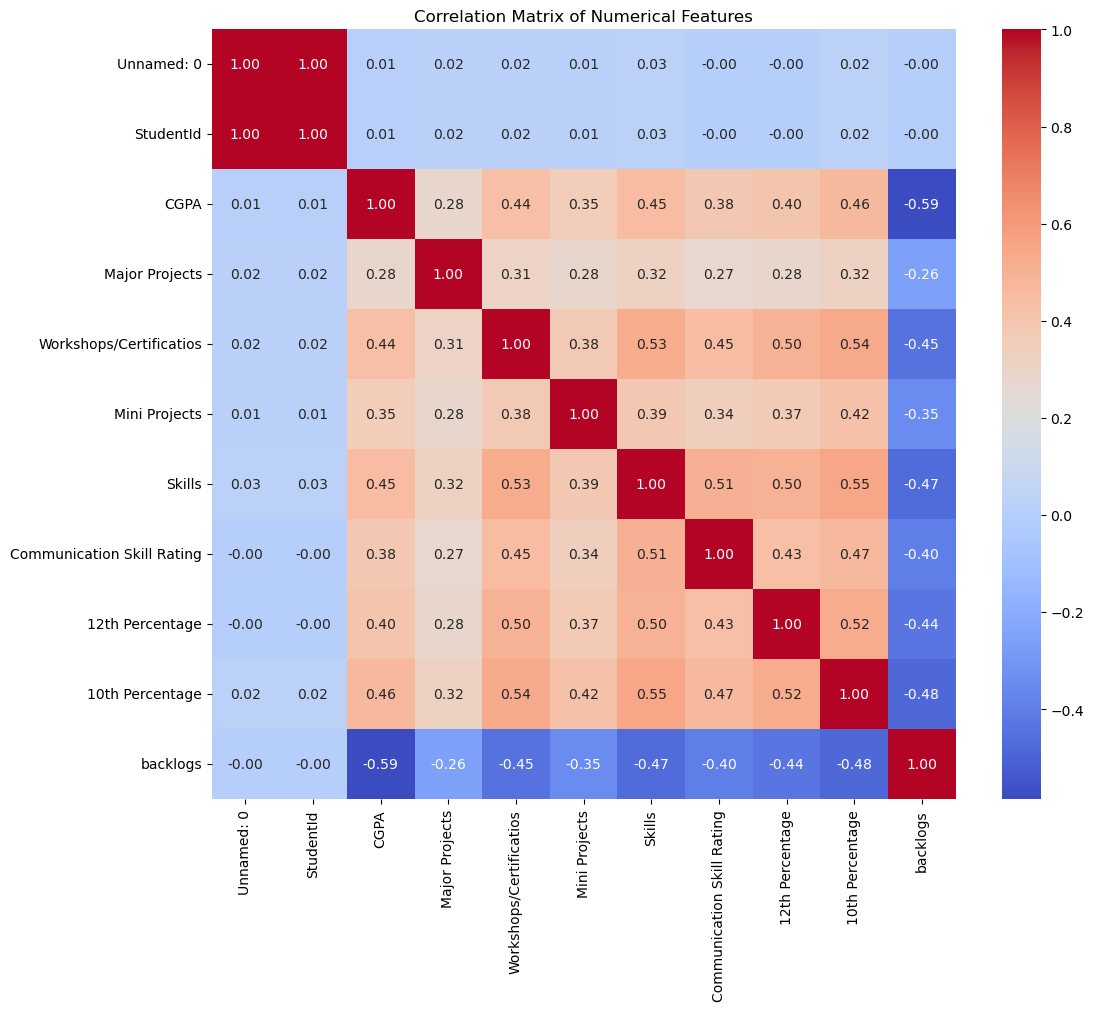


Correlation with Placement Status:
PlacementStatus_numeric       1.000000
Skills                        0.515559
10th Percentage               0.505746
Workshops/Certificatios       0.475186
12th Percentage               0.469763
Communication Skill Rating    0.427284
CGPA                          0.423131
Mini Projects                 0.362268
Major Projects                0.260340
Unnamed: 0                    0.004294
StudentId                     0.004294
backlogs                     -0.751820
Name: PlacementStatus_numeric, dtype: float64


In [7]:
# Calculate correlations between features (only numerical features)
correlation_matrix = df.select_dtypes(include=['number']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Calculate correlation with target variable
# Assuming 'PlacementStatus' is the target variable (needs to be converted to numerical)
df['PlacementStatus_numeric'] = df['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})
numerical_features = df.select_dtypes(include=['number']).columns
correlation_with_target = df[numerical_features].corr()['PlacementStatus_numeric'].sort_values(ascending=False)
print("\nCorrelation with Placement Status:")
print(correlation_with_target)

In [8]:
# Calculate correlation with target variable (only numerical features)
correlation_with_target = df.select_dtypes(include=['number']).corr()['CGPA'].sort_values(ascending=False)
print("\nCorrelation with CGPA (Numerical features only):")
print(correlation_with_target)


Correlation with CGPA (Numerical features only):
CGPA                          1.000000
10th Percentage               0.462313
Skills                        0.451911
Workshops/Certificatios       0.435928
PlacementStatus_numeric       0.423131
12th Percentage               0.404971
Communication Skill Rating    0.383547
Mini Projects                 0.349686
Major Projects                0.280601
Unnamed: 0                    0.005724
StudentId                     0.005724
backlogs                     -0.585865
Name: CGPA, dtype: float64


## Data cleaning

### Subtask:
Clean the dataset by handling any missing values or outliers, and potentially transforming the data to be more suitable for model training.


Missing values per column:
Unnamed: 0                    0
StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
PlacementStatus_numeric       0
dtype: int64


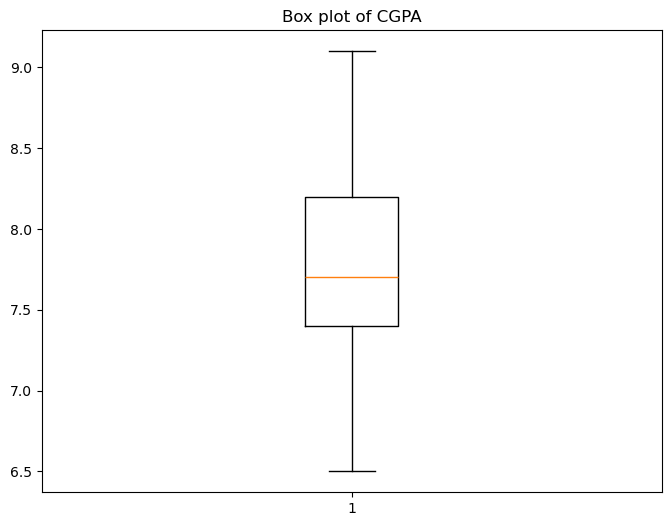

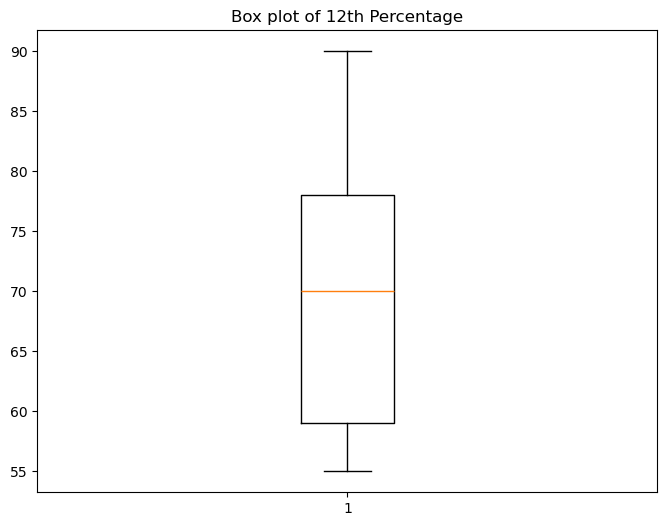

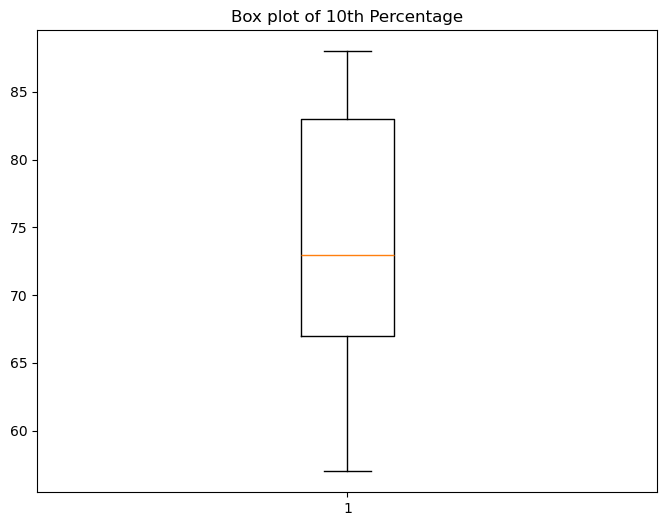

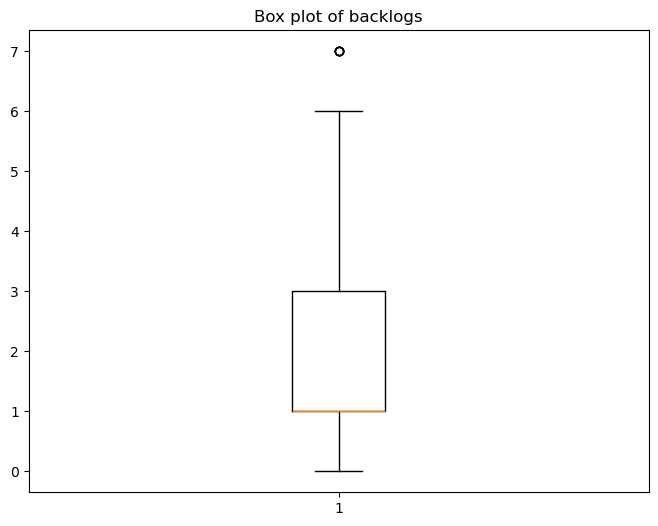

In [9]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for outliers in numerical features using box plots
import matplotlib.pyplot as plt
numerical_features = ['CGPA', '12th Percentage', '10th Percentage', 'backlogs']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[feature])
  plt.title(f"Box plot of {feature}")
  plt.show()

# Treat outliers (if any) based on the box plots. For example, we can replace outliers with the median.
# For this example, we'll replace outliers in 'backlogs' with the median
median_backlogs = df['backlogs'].median()
df['backlogs'] = df['backlogs'].apply(lambda x: median_backlogs if x > df['backlogs'].quantile(0.95) else x)

In [10]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for standardization
numerical_features = ['CGPA', '12th Percentage', '10th Percentage', 'backlogs']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the updated dataframe
display(df.head())

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus,PlacementStatus_numeric
0,0,1,-0.309343,1,1,1,6,4.4,No,No,-0.782306,0.504368,0.194392,NotPlaced,0
1,1,2,1.877818,0,3,2,9,4.0,Yes,Yes,0.847618,0.840726,-1.249293,Placed,1
2,2,3,-0.621794,1,2,2,8,4.8,Yes,No,0.943496,0.616487,0.194392,NotPlaced,0
3,3,4,-0.309343,1,1,2,8,4.4,Yes,Yes,1.135251,0.616487,-1.249293,Placed,1
4,4,5,0.940464,1,2,2,8,4.5,Yes,Yes,0.464106,1.513441,-1.249293,Placed,1


## Feature engineering

### Subtask:
Prepare the data for model training by converting categorical features into a suitable numerical representation.


In [11]:
df_encoded = pd.get_dummies(df, columns=['Internship', 'Hackathon', 'PlacementStatus'], drop_first=True)
display(df_encoded.head())

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,12th Percentage,10th Percentage,backlogs,PlacementStatus_numeric,Internship_Yes,Hackathon_Yes,PlacementStatus_Placed
0,0,1,-0.309343,1,1,1,6,4.4,-0.782306,0.504368,0.194392,0,False,False,False
1,1,2,1.877818,0,3,2,9,4.0,0.847618,0.840726,-1.249293,1,True,True,True
2,2,3,-0.621794,1,2,2,8,4.8,0.943496,0.616487,0.194392,0,True,False,False
3,3,4,-0.309343,1,1,2,8,4.4,1.135251,0.616487,-1.249293,1,True,True,True
4,4,5,0.940464,1,2,2,8,4.5,0.464106,1.513441,-1.249293,1,True,True,True


## Data splitting

### Subtask:
Split the encoded dataset into training and testing sets.


In [12]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = df_encoded.drop(['PlacementStatus_Placed', 'StudentId', 'Unnamed: 0', 'PlacementStatus_numeric'], axis=1)
y = df_encoded['PlacementStatus_Placed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a classification model to predict the placement status of students.


In [13]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object with increased max_iter
model = LogisticRegression(max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a LogisticRegression object
model = LogisticRegression(max_iter=1000)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [18]:
import joblib
# Save the model
joblib.dump(model, "student_model.pkl") 
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Model evaluation

### Subtask:
Evaluate the performance of the trained logistic regression model using appropriate metrics.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the calculated metrics and the confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9290
Precision: 0.8943
Recall: 0.9396
F1-score: 0.9164

Confusion Matrix:
[[1080   92]
 [  50  778]]


## Data visualization

### Subtask:
Visualize the important features that influence placement prediction.


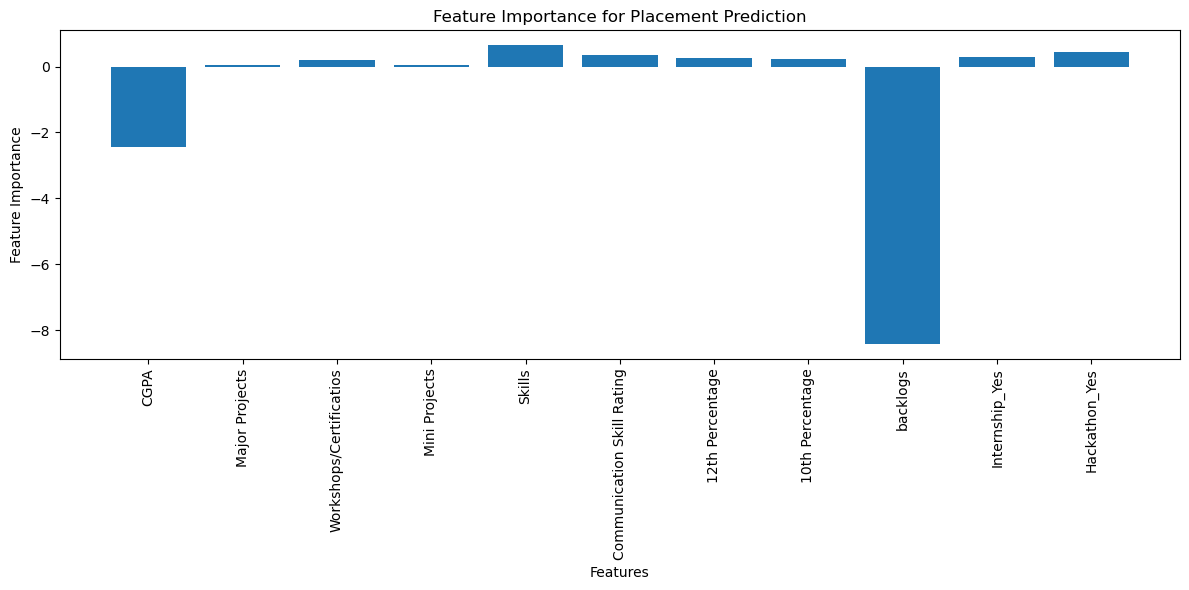

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance from the model coefficients
feature_importance = model.coef_[0]

# Create a bar chart of feature importance
plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Placement Prediction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

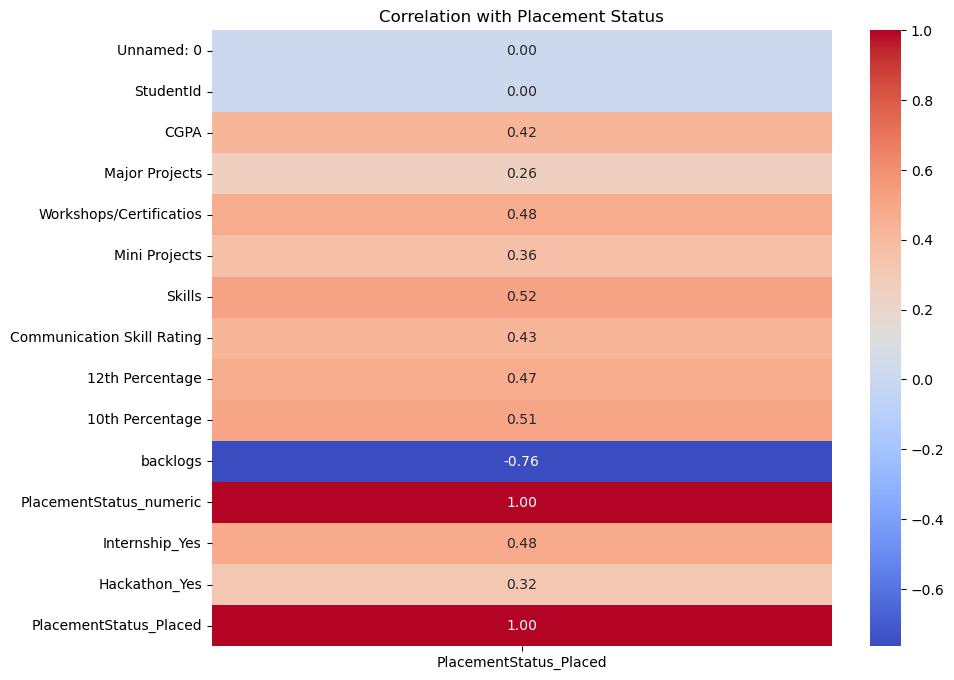

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix between features and the target variable
correlation_matrix = df_encoded.corr()

# Select the correlation with PlacementStatus_Placed
target_correlation = correlation_matrix['PlacementStatus_Placed']

# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['PlacementStatus_Placed']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Placement Status')
plt.show()

In [ ]:
feature_names = X_train.columns.tolist()
print(feature_names)

['CGPA', 'Major Projects', 'Workshops/Certificatios', 'Mini Projects', 'Skills', 'Communication Skill Rating', '12th Percentage', '10th Percentage', 'backlogs', 'Internship_Yes', 'Hackathon_Yes']


In [ ]:
import numpy as np

def predict_from_input(model, scaler, feature_names):
    """
    Allows the user to manually input data for prediction.

    Parameters:
    model: Trained machine learning model
    scaler: Fitted StandardScaler used during training
    feature_names: List of feature names expected by the model

    Returns:
    Prediction from the model
    """
    try:
        print("Enter values for the following features:")
        input_data = []
        for feature in feature_names:
            while True:
                try:
                    value = float(input(f"{feature}: "))
                    input_data.append(value)
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

        # Convert input into numpy array and reshape for model
        input_array = np.array(input_data).reshape(1, -1)

        # Scale input using the same scaler from training
        input_scaled = scaler.transform(input_array)

        # Make prediction
        prediction = model.predict(input_scaled)
        print(f"Predicted Output: {prediction[0]}")
        return prediction[0]

    except Exception as e:
        print(f"Error: {e}")
        return None


In [ ]:
predict_from_input(model, scaler, feature_names)

Enter values for the following features:
Predicted Output: False


c:\Users\yashm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


False